In [1]:
import matplotlib.pyplot as plt

from scipy.special import logit,expit
import tree_braider2 as trbr
import tree_reader as trr
import lumberjack

import numpy as np

In [2]:
# r1 = {}

# r1['feature'] = '0'
# r1['split'] = 1
# r1['features'] = ['1']
# r1['samples'] = ['0','1','2']
# r1['medians'] = [0]
# r1['dispersions'] = [0]
# r1['local_gains'] = None
# r1['absolute_gains'] = None
# r1['children'] = []


In [3]:
# c1 = {}

# c1['feature'] = '0'
# c1['split'] = 1
# c1['features']= ['1']
# c1['samples'] = ['1','2']
# c1['medians'] = [0]
# c1['dispersions'] = [0]
# c1['local_gains'] = None
# c1['absolute_gains'] = None
# c1['children'] = []

# c2 = {}

# c2['feature'] = '0'
# c2['split'] = 1
# c2['features']= ['1']
# c2['samples'] = ['0']
# c2['medians'] = [0]
# c2['dispersions'] = [0]
# c2['local_gains'] = None
# c2['absolute_gains'] = None
# c2['children'] = []


# r1['children'] = [c1,c2]


In [4]:
# test_counts = np.array([[1],[2],[3]])

# test_forest = trr.Forest([r1],test_counts)

In [5]:
# test_forest.nodes()

In [6]:
# test_forest.truth_dictionary.sample_dictionary

In [7]:
# test_forest.nodes()[2].index

In [8]:
# test_forest.nodes()[2].lr_encoding_vectors()

In [9]:
iris = np.loadtxt('../testing/iris.trunc')

In [10]:
iris_forest = lumberjack.fit(iris,trees=100,depth=2)

Setting context
Input:(150, 4)
Output:(150, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j
['input.counts', 'tmp.ifh', 'output.counts', 'tmp.ofh']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/tmp.ifh -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/tmp.ofh -trees 100 -depth 2
Trying to readline

5.1 0
100
150,4

5.1 0
100
150,4
Automatic parameters:
ss:100
if:4
of:4
p:8
t:100
l:10
d:No
pm:Branch
Reading header: /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/tmp.ifh
R

Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 86
SSME
Unwrapping tree
Tree Pool: Sending 86
Tree Pool: Request for tree: 87
Tree Pool: Deriving 87
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/tmp.86.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 87
SSME
Unwrapping tree
Tree Pool: Sending 87
Tree Pool: Request for tree: 88
Tree Pool: Deriving 88
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/tmp.87.compact
Deriving from prototype: 100,4,4
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 88
SSME
Unwrapping tree
Tree Pool: Sending 88
Tree Pool: Request for tree: 89
Tree Pool: Deriving 89
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpzxdzle9j/tmp.88.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 89
SSME
Unwrapping tree
Tree Pool: Sending 89


In [11]:
iris_forest.nodes()[0].samples

['14',
 '38',
 '40',
 '2',
 '2',
 '6',
 '45',
 '8',
 '12',
 '4',
 '0',
 '49',
 '33',
 '19',
 '7',
 '7',
 '27',
 '27',
 '3',
 '10',
 '15',
 '15',
 '34',
 '21',
 '37',
 '29',
 '29',
 '43',
 '43',
 '43',
 '43',
 '43',
 '25',
 '23',
 '20',
 '20']

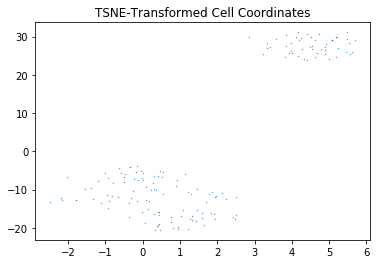

In [12]:
iftc = iris_forest.tsne()

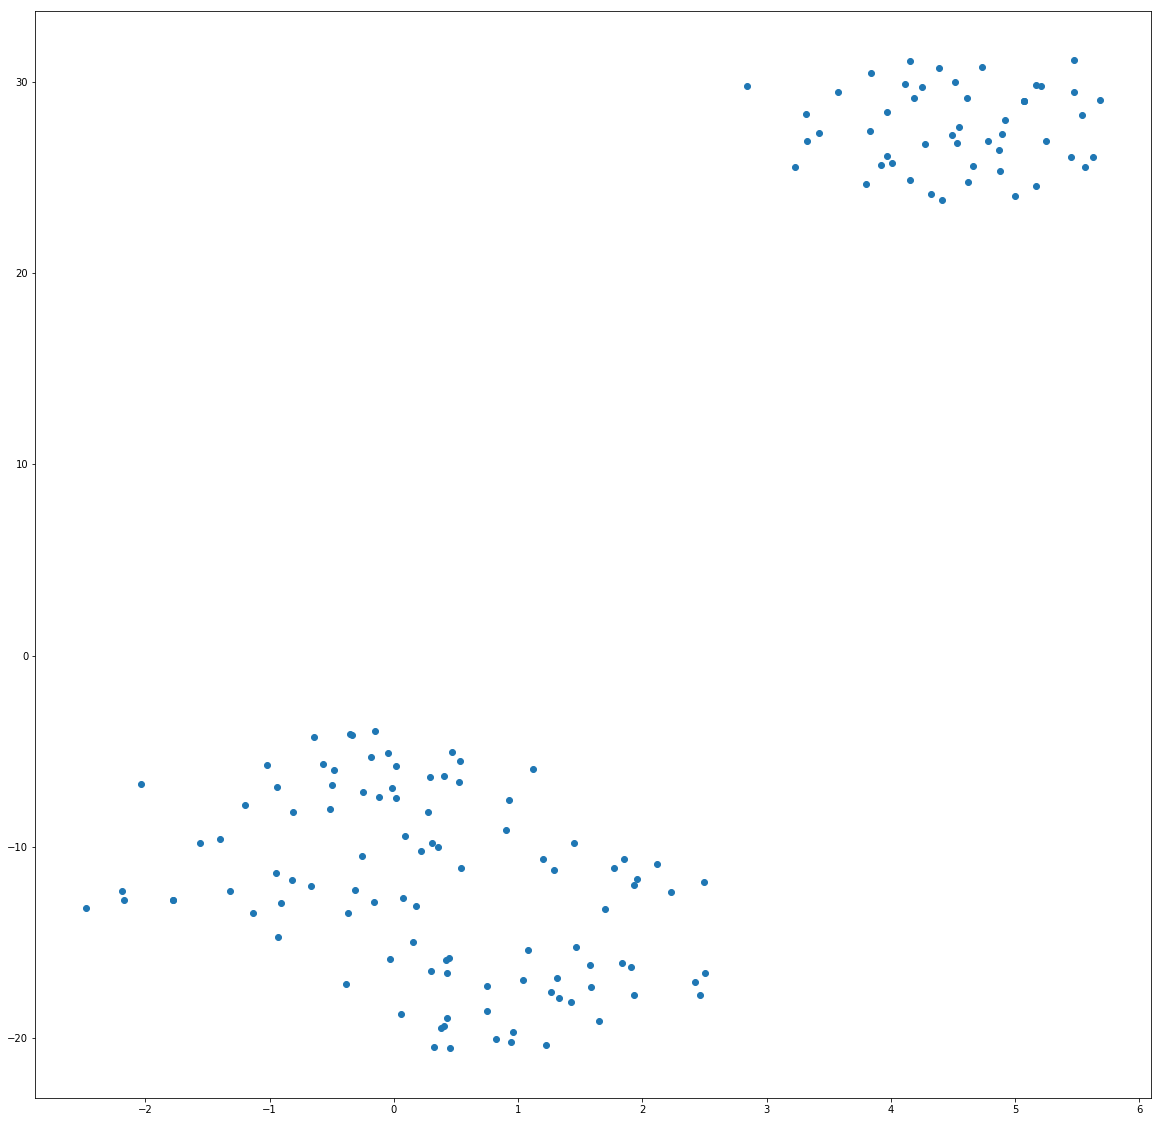

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(iftc[:,0],iftc[:,1])
plt.show()

In [14]:
braids = trbr.IHMM(iris_forest,beta=1,gamma=1,alpha_e=10,beta_e=10,start_states=100,p=1,inf_check=False)

In [15]:
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)

In [16]:
# print(braids.hidden_states[0].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)
# print(braids.hidden_states[4].node_odds())

In [17]:
# [n.hidden_state for n in braids.nodes]

In [18]:
for i in range(1000):
    print("+++++++++++++++++")
    print("ALPHA")
    print(braids.alpha)
    print("BETA")
    print(braids.beta)
    print("GAMMA")
    print(braids.gamma)
    print("+++++++++++++++++")
    braids.sweep()

# for hidden_state in range(braids.hidden_states):
#     print(np.sum(braids.state_masks[hidden_state]))
#     plt.figure(figsize=(20,20))
# #     plt.title(str(hidden_state.index))
#     plt.scatter(iftc[:,0],iftc[:,1],c=braids.lr_finite(hidden_state),cmap='bwr')
#     plt.show()
#     plt.figure()
#     plt.hist(hidden_state.node_odds())
#     plt.show()
    
# plt.figure()
# plt.imshow(braids.transition_counts,cmap='binary')
# plt.show()
    

+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
100
[ 0  0  0  0  6 56 25  0  0  0  0 59 37 60  0  0  0  0 67 79 79  0  0  0
  0 63 11 55  0  0  0  0 55  4 60  0  0  0  0 68 50 45  0  0  0  0 16 36
 63  0  0  0  0 92 33 41  0  0  0  0 73 86 57  0  0  0  0  4 84 18  0  0
  0  0  2 47 30  0  0  0  0 46  5 76  0  0  0  0  6 51 86  0  0  0  0 76
  6 63  0  0  0  0 36 21 55  0  0  0  0 75 72  5  0  0  0  0 63 63 23  0
  0  0  0 87 45 86  0  0  0  0 68 31 17  0  0  0  0 69 48 41  0  0  0  0
  7 51 84  0  0  0  0 12  5 62  0  0  0  0  7 77 28  0  0  0  0 83  4  5
  0  0  0  0 49 95 19  0  0  0  0 21 42 50  0  0  0  0  3 57 51  0  0  0
  0 89 66 26  0  0  0  0 43 77 46  0  0  0  0 62 39 27  0  0  0  0 56  4
 86  0  0  0  0  8 38 27  0  0  0  0 93 11 11  0  0  0  0 70 92 98  0  0
  0  0 60 36 70  0  0  0  0 95 21 67  0  0  0  0 18 53 70  0  0  0  0 64
 83 87  0  0  0  0 11  1 50  0  0  0  0 48 49 63  0  0  0  0 16 10  1  0
  0  0  0  3 70 48  0  0  0  0  3 69  6  0  0  0  0  9 

Computing oracle odds
[ 0.  1. 15.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 2 2 0 0 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

[400, 94, 206]
State Index Cleanup
[0, 1, 2]
{0: 0, 1: 1, 2: 2}
Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2]
[400, 97, 203]
State Index Cleanup
[0, 1, 2]
{0: 0, 1: 1, 2: 2}
Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

Beta:1
Gamma:1
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 2 2 0 0 

Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 2 2 0 0 0 0 2 1

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:1
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 2 2 0 0 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:1
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

{0: 0, 1: 1, 2: 2}
Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:1
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 

Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 

(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2

Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2

Computing oracle odds
[0. 1. 3.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 2 2 0 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:1
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 

Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:1
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 2 2 0 0 

[400, 97, 203]
State Index Cleanup
[0, 1, 2]
{0: 0, 1: 1, 2: 2}
Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1

Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 

Sampling states
New state created
0
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0

Computing State Masks
Recomputing Sample Log Odds
(3, 150, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1.]
Sampling states
New state created
0


In [19]:
braids.backup('./test.remove_later')

In [20]:
braids = trbr.IHMM.reconstitute('./test.remove_later')

In [21]:
ni = 20
print(braids.live_mask[20])
print(braids.state_log_odds[:,20])
print(braids.state_log_odds_given_divergence[:,20])
print(braids.state_log_odds_given_child_l[:,20])
print(braids.state_log_odds_given_child_r[:,20])

True
[-18.93056699 -14.00335357 109.17387738 -14.78978834]
[ 0.          2.48242858 97.91556046  0.        ]
[-9.49385545 -8.27146303  5.65830393 -7.42346612]
[-9.43671154 -8.21431912  5.60001299 -7.36632221]


In [22]:
# braids.child_state_l[braids.live_mask]

In [23]:
# plt.figure()
# plt.imshow(braids.recompute_state_masks(braids.node_states)[:,braids.live_mask],cmap='binary',aspect='auto')
# plt.show()

In [24]:
# plt.figure()
# plt.imshow(braids.most_likely_parent_to_child(),cmap='binary')
# plt.show()
# braids.state_masks.shape

# for i in range(300):
#     braids.sweep()

# for i in range(300):
#     braids.sample_states()

# plt.figure()
# plt.imshow(sweep,aspect='auto')
# plt.show()

# print(str(list(sweep)))
# print(sweep.shape)

In [25]:
braids.state_log_odds

array([[-2.29096267e+01, -2.29096267e+01, -2.29096267e+01, ...,
        -2.29096267e+01, -2.29096267e+01, -1.89305670e+01],
       [-1.41061599e-01, -1.41061599e-01, -1.41061599e-01, ...,
         1.04905540e-01,  2.25832677e+01, -1.31491738e+01],
       [ 8.84644567e-02,  8.84644567e-02,  8.84644567e-02, ...,
         2.99543196e+01,  9.24909716e+00,  1.24195974e+02],
       [-1.87688480e+01, -1.87688480e+01, -1.87688480e+01, ...,
        -1.87688480e+01, -1.87688480e+01, -1.47897883e+01]])

In [26]:
# braids.node_states[braids.live_mask]
# braids.sweep()

/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:1143: RuntimeWarning: divide by zero encountered in true_divide
  return expit(np.log2(self.state_raw_emission_counts[state][:,0]/self.state_raw_emission_counts[state][:,1]))
/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:1143: RuntimeWarning: invalid value encountered in true_divide
  return expit(np.log2(self.state_raw_emission_counts[state][:,0]/self.state_raw_emission_counts[state][:,1]))
/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:1143: RuntimeWarning: divide by zero encountered in log2
  return expit(np.log2(self.state_raw_emission_counts[state][:,0]/self.state_raw_emission_counts[state][:,1]))


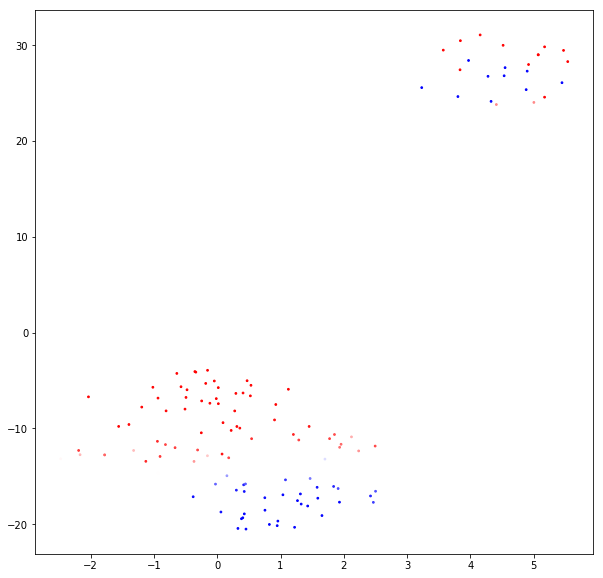

In [27]:
# braids.lr_finite(2)
plt.figure(figsize=(10,10))
plt.scatter(iftc[:,0],iftc[:,1],s=3,c=braids.lr_finite(1),cmap='bwr')
plt.show()

# plt.figure(figsize=(10,10))
# plt.scatter(iftc[:,0],iftc[:,1],s=3,c=braids.hidden_states[3].lr_finite(),cmap='bwr')
# plt.show()


In [28]:
braids.most_likely_parent_to_child()

Recomputing Transition Counts
3
[0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2
 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0
 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0
 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1
 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0
 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0
 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 1 2 0 0 0 0 2 2 2 0 0

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
braids.max_likelihood_sweep()

In [ ]:
def likelihood_gamma(k,tt,max_gamma=None,prior=True):

    if max_gamma is None:

        max_gamma = tt + 1

    log_sequence = np.log2(np.arange(1,max_gamma*2))

    if prior:
        l2l = lambda g: ((k * np.log2(g)) - (np.sum(log_sequence[g+1:tt+g+1]) + (np.log2(g))))
    else:     
        l2l = lambda g: ((k * np.log2(g)) - (np.sum(log_sequence[g+1:tt+g+1])))

    likelihood_sequence = np.array([l2l(g) for g in range(1,max_gamma)])
    
    if np.argmax(likelihood_sequence) + 1 == len(likelihood_sequence) and max_gamma < 10000:
        likelihood_gamma(k,tt, max_gamma = max_gamma * 5)
        return None
    else:
        print(np.argmax(likelihood_sequence)+1)
        plt.figure()
        plt.plot(np.arange(len(likelihood_sequence)),likelihood_sequence)
        plt.xlim(0,100)
        plt.show()

In [ ]:
likelihood_gamma(100,12500,prior=True)
likelihood_gamma(100,12500,prior=False)

likelihood_gamma(100,100,prior=True)
likelihood_gamma(100,100,prior=False)

likelihood_gamma(10,10,prior=True)
likelihood_gamma(10,10,prior=False)


likelihood_gamma(2,2,prior=True)
likelihood_gamma(2,2,prior=False)

In [ ]:
    def recompute_beta(transition_counts,max_beta=None,prior=True):

        if max_beta is None:
            
            max_beta = int(np.max(np.sum(transition_counts,axis=0)) * 2)

        log_sequence = np.log2(np.arange(1,max_beta*2))

        likelihood_sequence = np.zeros(max_beta)[1:]

        for i,transitions in enumerate(transition_counts):
            total = int(np.sum(transitions))
            non_zero = int(np.sum(transitions > 0))
            l2ls = lambda b: (((non_zero - 1) * np.log2(b)) - np.sum(log_sequence[b:total+b]))
            likelihood_sequence += np.array([l2ls(b) for b in range(1,max_beta)])
        
        if prior:
            likelihood_sequence -= log_sequence[:len(likelihood_sequence)]
                
        if np.argmax(likelihood_sequence) + 1 == len(likelihood_sequence) and max_beta < 10000:
            likelihood_gamma(k,tt, max_beta = max_beta * 5)
            return None
        else:
            print(np.argmax(likelihood_sequence) + 1)
            plt.figure()
            plt.plot(np.arange(len(likelihood_sequence)),likelihood_sequence)
            plt.xlim(0,100)
            plt.show()
        

In [ ]:
diffuse_transitions = np.ones((50,50)) * 5
checkered_transitions = diffuse_transitions.copy()
checkered_transitions[np.random.random(checkered_transitions.shape) > 0.9] = 0

concentrated_transitions = np.ones((5,5)) * 500

limit_transitions = np.ones((1,1)) * 12500

halo = diffuse_transitions.copy()
halo[:2] = 100

recompute_beta(diffuse_transitions,prior=True)
recompute_beta(diffuse_transitions,prior=False)

recompute_beta(concentrated_transitions,prior=True)
recompute_beta(concentrated_transitions,prior=False)

recompute_beta(limit_transitions,prior=True)
recompute_beta(limit_transitions,prior=False)

recompute_beta(checkered_transitions,prior=True)
recompute_beta(checkered_transitions,prior=False)

recompute_beta(halo,prior=True)
recompute_beta(halo,prior=False)

